# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [55]:
import math
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [56]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [57]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        res = np.linalg.norm(np.dot(X, w) - y) ** 2 / np.shape(y)[0]
        return res
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        res = (2 / np.shape(y)[0]) * np.dot(X.T, np.dot(X, w) - y)
        return res
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [58]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483.,
                                                      1199584., 1208685., 1217786., 1226887.,
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [59]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                     loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    last_step = w_init
    traj = np.ndarray(shape=(n_iterations + 1, len(w_init)))
    traj[0] = w_init

    for i in range(n_iterations):
        last_step = last_step - lr * loss.calc_grad(X, y, last_step)
        traj[i + 1] = last_step

    return traj

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [60]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [61]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)

print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045025
0.8670644395649494


In [62]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1,
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

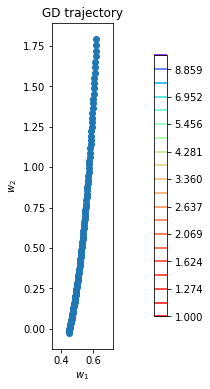

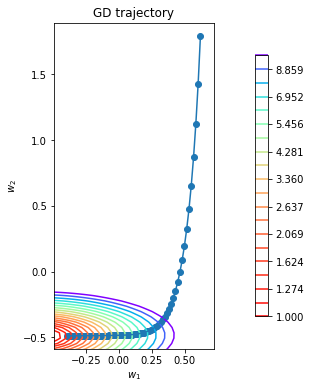

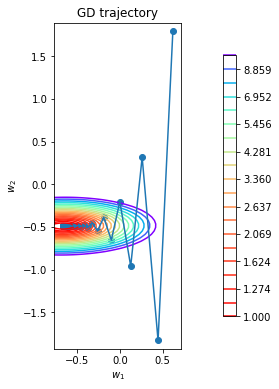

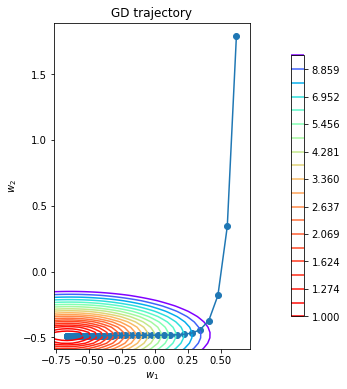

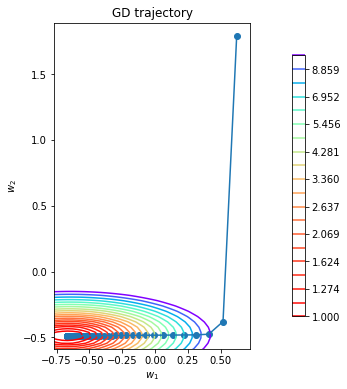

In [63]:
lrs = [0.0001, 0.001, 0.01, 0.004, 0.006]

for lr in lrs:
    plot_gd(gradient_descent(w_init, X, y, loss, lr, 100), X, y, loss)

# При слишком маленьком шаге, спуск не успевает спуститься до минимума (1 и 2 графики),
# при большом значениии шага (3 график) спуск начинает сильно "штормить" и он может перескавивать минимум
# при +- оптимальных шагах (4 и 5 графики) спуск в конечном итоге попадает примерно в минимум.
# Траектория предпоследнего графика все же выглядит более привлекательной, так как спуск там плавнее и тоже
# попадает примерно в минимум.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [64]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                                loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[
    np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    last_step = w_init
    traj = np.ndarray(shape=(n_iterations + 1, 2))
    traj[0] = w_init

    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        batch_ans = y[batch_indices]
        last_step = last_step - lr * loss.calc_grad(batch, batch_ans, last_step)
        traj[i + 1] = last_step

    return traj

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

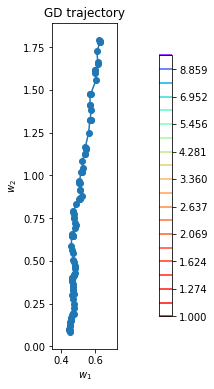

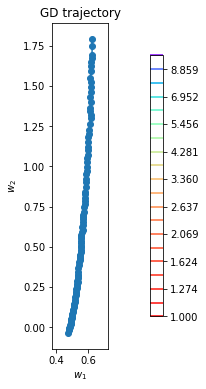

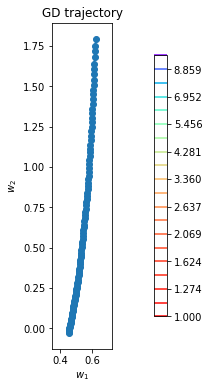

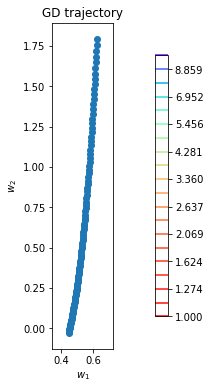

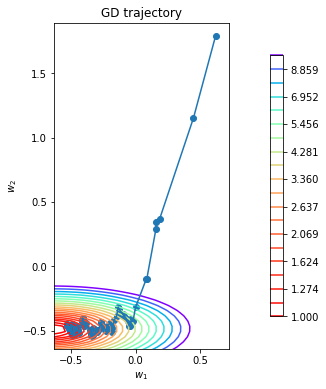

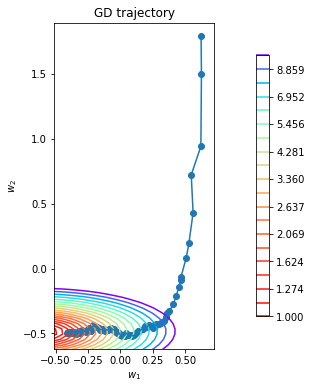

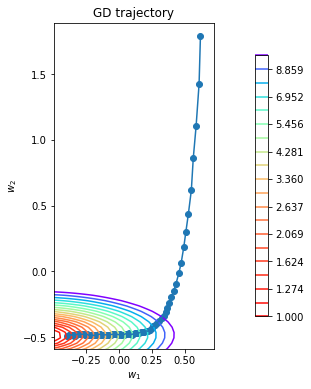

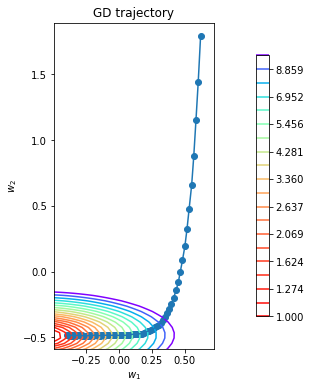

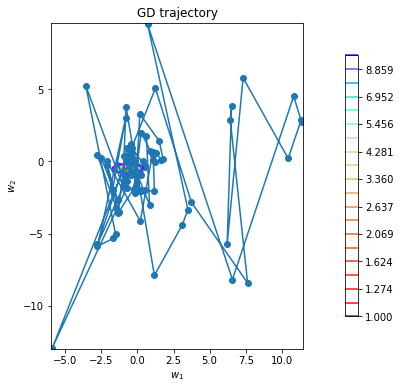

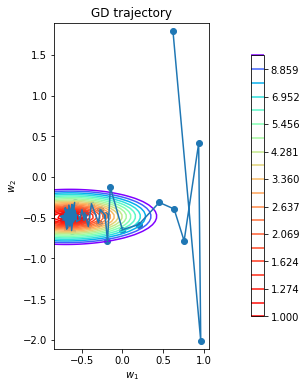

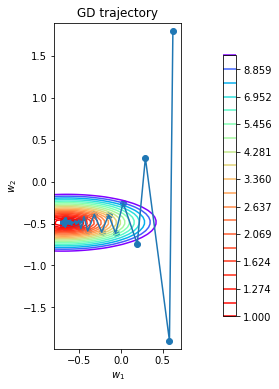

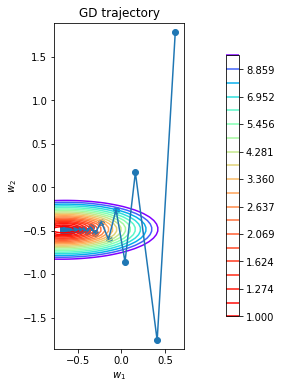

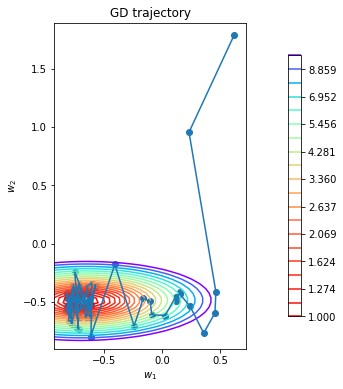

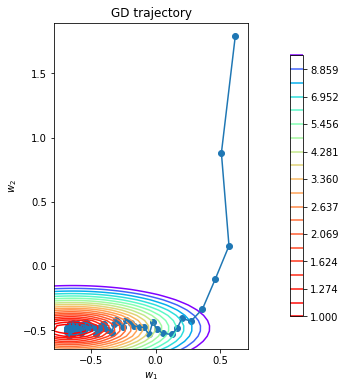

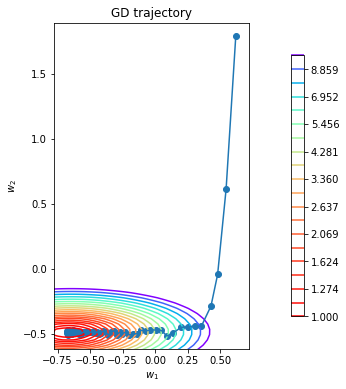

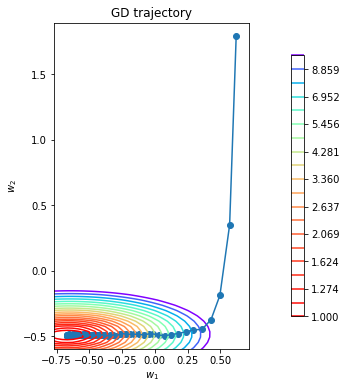

In [65]:
import itertools as it

lrs = [0.0001, 0.001, 0.01, 0.004]
batch_sizes = [1, 10, 80, 200]
all_combs = it.product(lrs, batch_sizes, repeat=1)

for lr, batch_size in all_combs:
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 100), X, y, loss)

# В целом спуск теперь не идет целенаправленно к минимум, а делает это "поштармилваясь",
# так как теперь он идет в сторону антиградиента не всей выборки, а только нескольких объектов.
# При увеличении batch_size траектория становится более устремленной и начинает напоминать
# обычный градиентный спуск.
# При малых lr все так же спуск не доходит до минимума.
# При небольшом увеличении lr спуск оказался дальше от минимума, нежели обычный, так как
# не везде траектория была такой, как нужно.
# При больших lr и маленьком batch спуск вовсе начинал делать что-то невнятное, так
# как каждый раз делал большой шаг в сторону "немного не туда".
# При хорошем lr и относительно немаленьком batch спуск уже ведет себя прекрасно и находит примерно минимум.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [66]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                                loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[
    np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    last_step = w_init
    traj = np.ndarray(shape=(n_iterations + 1, len(w_init)))
    traj[0] = w_init
    s0 = 1

    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        batch_ans = y[batch_indices]

        current_lr = lr * (s0 / (s0 + i)) ** p
        last_step = last_step - current_lr * loss.calc_grad(batch, batch_ans, last_step)
        traj[i + 1] = last_step

    return traj

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

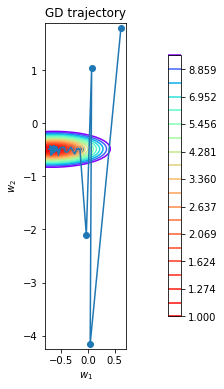

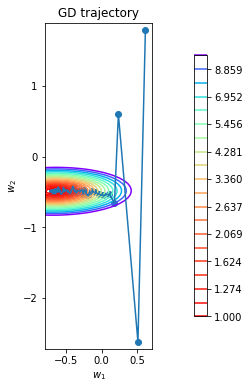

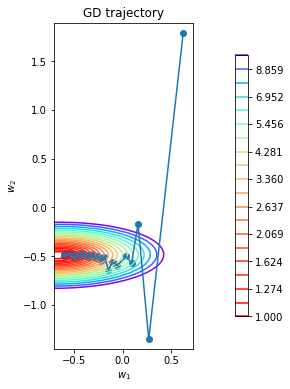

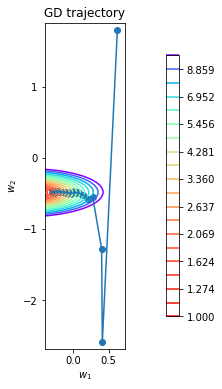

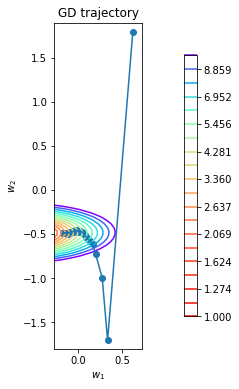

In [67]:
ps = [0.1, 0.25, 0.5, 0.8, 1]

for p in ps:
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 100), X, y, loss)

# При больших p спуск слишком быстро затухает и не доходит до минимума.
# При маленьком p спуск может перепрыгивать минимум, так как шаг слишком велик.
# При p = 0.5 спуск ведет себя очень хорошо, затухая с отличной скоростью,
# что позволяет за маленькое число шагов попасть в примерно минимум.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

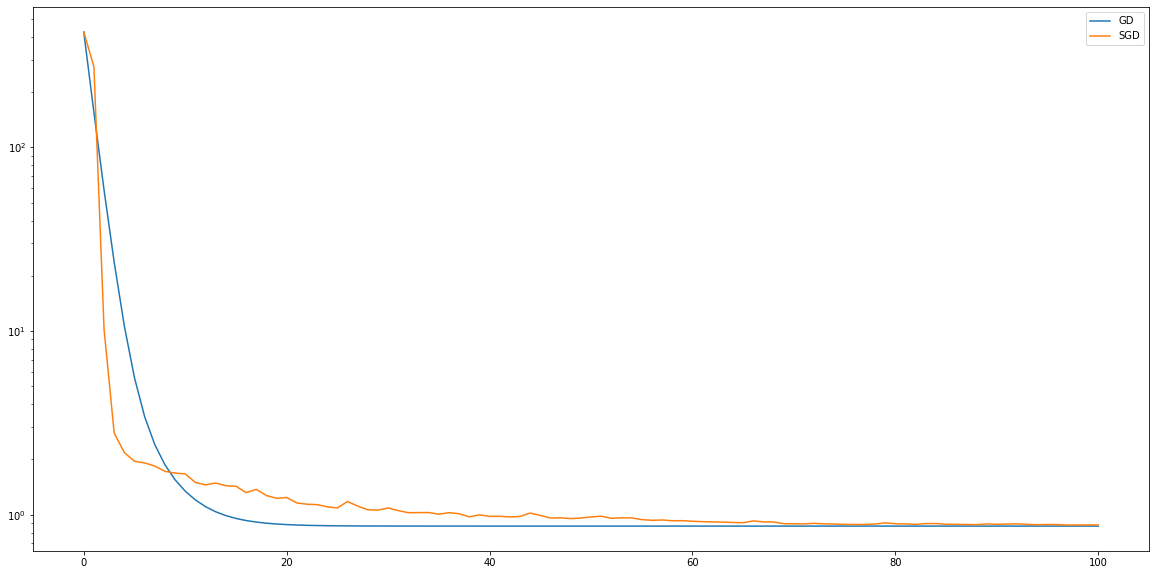

In [68]:
lr = 0.01
n_iters = 100
p = 0.5
batch_size = 10

gd_traj = gradient_descent(w_init, X, y, loss, lr, n_iters)
sgd_traj = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, n_iters)

y_gd = [loss.calc_loss(X, y, weights) for weights in gd_traj]
y_sgd = [loss.calc_loss(X, y, weights) for weights in sgd_traj]
x = [i for i in range(n_iters + 1)]
fig = plt.figure(figsize=(20, 10))

plt.plot(x, y_gd, label='GD')
plt.plot(x, y_sgd, label='SGD')
plt.legend()
plt.semilogy()

plt.show()

# Преимущество есть только на первых итерациях (скорее всего, из-за того, что шаг изначально велик),
# но потом MSE быстрее падает на обычном градиентном спуске (так как идет движение не четко в сторону минимума).
# Суть стохастического спуска не в том, чтобы на более ранней итерации найти минимум функции,
# а в том, что каждая итерация выполняется быстрее из-за того, что ищется градиент не по всей
# выборке.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [69]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        np.random.seed(187)
        w_init = np.random.uniform(-2, 2, X.shape[1])
        traj = gradient_descent(w_init, X, y, self.loss, self.lr)  #todo
        self.w = traj[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [70]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [71]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"]
)

# Как я понял, удаляем объекты с пропущенной целевой переменной
# и создаем новый индекс.
X_raw = X_raw[~X_raw[25].isna()].reset_index()
X_raw.head(20)

,index,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,5,2,NaN,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,6,1,158.0,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,7,1,NaN,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,10,2,192.0,bmw,gas,std,two,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0


In [72]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [73]:
# Колонка index бесполезна.
X_raw = X_raw.drop('index', axis=1)

# One hot.
X_raw = pd.get_dummies(X_raw, drop_first=True)

In [74]:
from sklearn.model_selection import train_test_split

# Разбитие.
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=3212)
X_train

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
196,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
158,0,91.0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,...,0,0,0,1,0,0,0,0,0,0
138,0,102.0,97.2,172.0,65.4,52.5,2190,108,3.62,2.64,...,0,0,0,1,0,0,0,0,0,0
150,0,81.0,95.7,169.7,63.6,59.1,2290,92,3.05,3.03,...,0,0,0,1,0,0,0,0,0,0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,91.0,95.7,166.3,64.4,53.0,2275,110,3.27,3.35,...,0,0,0,0,0,1,0,0,0,0
26,1,148.0,93.7,157.3,63.8,50.6,2191,98,3.03,3.39,...,0,0,0,0,0,0,0,1,0,0
134,2,83.0,93.7,156.9,63.4,53.7,2050,97,3.62,2.36,...,0,0,0,1,0,0,0,0,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [75]:
from sklearn.impute import SimpleImputer

# Из семинара 3.

# Убираем пропуски.
replacer = SimpleImputer(strategy='mean')
X_train.columns = [str(col) for col in X_train.columns]
X_test.columns = [str(col) for col in X_train.columns]

replacer.fit(X_train)

X_train_filled = pd.DataFrame(data=replacer.transform(X_train), columns=X_train.columns,
                              index=X_train.index)
X_test_filled = pd.DataFrame(data=replacer.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train_filled.head(20)

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
196,-1.0,95.000000,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158,0.0,91.000000,95.7,166.3,64.4,52.8,2140.0,98.0,3.19,3.03,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
138,0.0,102.000000,97.2,172.0,65.4,52.5,2190.0,108.0,3.62,2.64,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,81.000000,95.7,169.7,63.6,59.1,2290.0,92.0,3.05,3.03,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,121.358974,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
71,1.0,121.358974,112.0,199.2,72.0,55.4,3715.0,304.0,3.80,3.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197,-1.0,95.000000,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41,1.0,107.000000,96.5,169.1,66.0,51.0,2293.0,110.0,3.15,3.58,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
170,-1.0,65.000000,102.4,175.6,66.5,54.9,2480.0,110.0,3.27,3.35,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29,2.0,137.000000,86.6,144.6,63.9,50.8,1713.0,92.0,2.91,3.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train_filled)

X_train_norm = scaler.transform(X_train_filled)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train_filled.columns, index=X_train_filled.index)

X_test_norm = scaler.transform(X_test_filled)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test_filled.columns, index=X_test_filled.index)

X_train_norm.head(20)

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
196,-1.428784,-0.834818,1.831045,1.276577,1.602217,0.819021,0.865875,0.385694,1.794053,-0.410236,...,0.0,-0.084819,-0.147979,-0.688247,-0.147979,-0.346410,0.0,1.121635,-0.211604,0.0
158,-0.615655,-0.961503,-0.481958,-0.621119,-0.709732,-0.306760,-0.759956,-0.668269,-0.474261,-0.797393,...,0.0,-0.084819,-0.147979,1.452966,-0.147979,-0.346410,0.0,-0.891556,-0.211604,0.0
138,-0.615655,-0.613120,-0.223040,-0.140369,-0.195965,-0.431847,-0.659843,-0.423161,1.178917,-2.055655,...,0.0,-0.084819,-0.147979,1.452966,-0.147979,-0.346410,0.0,-0.891556,-0.211604,0.0
150,-0.615655,-1.278214,-0.481958,-0.334356,-1.120745,2.320062,-0.459618,-0.815333,-1.012505,-0.797393,...,0.0,-0.084819,-0.147979,1.452966,-0.147979,-0.346410,0.0,-0.891556,-0.211604,0.0
1,1.823733,0.000000,-1.707504,-0.410264,-0.863861,-1.974584,0.056964,0.116076,0.602227,-1.926602,...,0.0,-0.084819,-0.147979,-0.688247,-0.147979,-0.346410,0.0,1.121635,-0.211604,0.0
71,0.197474,0.000000,2.331620,2.153733,3.194893,0.777325,2.393596,4.380950,1.870945,0.235026,...,0.0,-0.084819,-0.147979,-0.688247,-0.147979,-0.346410,0.0,1.121635,-0.211604,0.0
197,-1.428784,-0.834818,1.831045,1.276577,1.550840,0.819021,1.060094,0.385694,1.794053,-0.410236,...,0.0,-0.084819,-0.147979,-0.688247,-0.147979,-0.346410,0.0,1.121635,-0.211604,0.0
41,0.197474,-0.454765,-0.343868,-0.384961,0.112295,-1.057281,-0.453611,-0.374139,-0.628045,0.977078,...,0.0,-0.084819,-0.147979,1.452966,-0.147979,-0.346410,0.0,-0.891556,-0.211604,0.0
170,-1.428784,-1.784952,0.674544,0.163262,0.369178,0.568847,-0.079189,-0.374139,-0.166693,0.235026,...,0.0,-0.084819,-0.147979,-0.688247,-0.147979,2.886751,0.0,-0.891556,-0.211604,0.0
29,1.010604,0.495369,-2.052729,-2.451340,-0.966615,-1.140672,-1.614919,-0.815333,-1.550749,0.428605,...,0.0,-0.084819,-0.147979,-0.688247,-0.147979,-0.346410,0.0,-0.891556,-0.211604,0.0


In [77]:
# Не масштабируем one-hot (если их масштабировать то регрессии нужно уменьшать шаг,
# а тут она уже создана с дефолтным шагом).

scaler.fit(X_train_filled.iloc[:, :15])
X_train_norm_no_hot = scaler.transform(X_train_filled.iloc[:, :15])
X_train_norm_no_hot = pd.DataFrame(X_train_norm_no_hot, columns=X_train_filled.columns[:15], index=X_train_filled.index)
X_train_processed = pd.concat([X_train_norm_no_hot, X_train_filled.iloc[:, 15:]], axis=1)

X_test_norm_no_hot = scaler.transform(X_test_filled.iloc[:, :15])
X_test_norm_no_hot = pd.DataFrame(X_test_norm_no_hot, columns=X_test_filled.columns[:15], index=X_test_filled.index)
X_test_processed = pd.concat([X_test_norm_no_hot, X_test_filled.iloc[:, 15:]], axis=1)

X_train_processed.head(20)

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
196,-1.428784,-0.834818,1.831045,1.276577,1.602217,0.819021,0.865875,0.385694,1.794053,-0.410236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158,-0.615655,-0.961503,-0.481958,-0.621119,-0.709732,-0.306760,-0.759956,-0.668269,-0.474261,-0.797393,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
138,-0.615655,-0.613120,-0.223040,-0.140369,-0.195965,-0.431847,-0.659843,-0.423161,1.178917,-2.055655,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
150,-0.615655,-1.278214,-0.481958,-0.334356,-1.120745,2.320062,-0.459618,-0.815333,-1.012505,-0.797393,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.823733,0.000000,-1.707504,-0.410264,-0.863861,-1.974584,0.056964,0.116076,0.602227,-1.926602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
71,0.197474,0.000000,2.331620,2.153733,3.194893,0.777325,2.393596,4.380950,1.870945,0.235026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197,-1.428784,-0.834818,1.831045,1.276577,1.550840,0.819021,1.060094,0.385694,1.794053,-0.410236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41,0.197474,-0.454765,-0.343868,-0.384961,0.112295,-1.057281,-0.453611,-0.374139,-0.628045,0.977078,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
170,-1.428784,-1.784952,0.674544,0.163262,0.369178,0.568847,-0.079189,-0.374139,-0.166693,0.235026,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29,1.010604,0.495369,-2.052729,-2.451340,-0.966615,-1.140672,-1.614919,-0.815333,-1.550749,0.428605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [78]:
linear_regression.fit(X_train_processed, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [79]:
from sklearn.metrics import mean_squared_error

y_predicted_train = linear_regression.predict(X_train_processed)
y_predicted_test = linear_regression.predict(X_test_processed)

print('MSE on train:', round(mean_squared_error(y_true=y_train, y_pred=y_predicted_train), 3))
print('MSE on test:', round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test), 3))

MSE on train: 1249012.076
MSE on test: 17090399.59


In [80]:
#Skleran LinReg ради интереса.

# from sklearn.linear_model import SGDRegressor as LR, Lasso
#
# lr = LR()
# np.random.seed(125)
# lr.fit(X_train_processed, y_train)
# lasso = Lasso()
# lasso.fit(X_train_processed, y_train)
#
#
# print('MSE on train:', round(mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train_processed)), 3))
# print('MSE on test:', round(mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test_processed)), 3))
# # print(lr.coef_)
#
# print('MSE on train lasso:', round(mean_squared_error(y_true=y_train, y_pred=lasso.predict(X_train_processed)), 3))
# print('MSE on test lasso:', round(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test_processed)), 3))
# # print(lasso.coef_)

Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [81]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        reg = self.coef * np.linalg.norm(w[:-1]) ** 2
        res = np.linalg.norm(np.dot(X, w) - y) ** 2 / np.shape(y)[0] + reg
        return res

    # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w_copy = np.ndarray.copy(w)
        w_copy[-1] = 0
        reg = 2 * self.coef * w_copy
        res = (2 / np.shape(y)[0]) * np.dot(X.T, np.dot(X, w) - y) + reg
        return res
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [82]:
linear_regression_l2 = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [83]:
param = 0.002
for i in range(20):
    linear_regression_l2 = LinearRegression(MSEL2Loss(param))
    linear_regression_l2.fit(X_train_processed, y_train)
    y_predicted_test_l2 = linear_regression_l2.predict(X_test_processed)
    score = round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test_l2), 3)
    param += 0.0001

    print('MSE on test:', score, 'param:', param)
# Выберем коэф = 0.0029

MSE on test: 7720159.481 param: 0.0021
MSE on test: 7710840.776 param: 0.0021999999999999997
MSE on test: 7703374.566 param: 0.0022999999999999995
MSE on test: 7697496.327 param: 0.0023999999999999994
MSE on test: 7692985.621 param: 0.002499999999999999
MSE on test: 7689657.561 param: 0.002599999999999999
MSE on test: 7687356.167 param: 0.002699999999999999
MSE on test: 7685949.134 param: 0.0027999999999999987
MSE on test: 7685323.689 param: 0.0028999999999999985
MSE on test: 7685383.266 param: 0.0029999999999999983
MSE on test: 7686044.83 param: 0.003099999999999998
MSE on test: 7687236.703 param: 0.003199999999999998
MSE on test: 7688896.789 param: 0.003299999999999998
MSE on test: 7690971.108 param: 0.0033999999999999976
MSE on test: 7693412.592 param: 0.0034999999999999975
MSE on test: 7696180.078 param: 0.0035999999999999973
MSE on test: 7699237.469 param: 0.003699999999999997
MSE on test: 7702553.029 param: 0.003799999999999997
MSE on test: 7706098.789 param: 0.003899999999999997

In [84]:
linear_regression_l2 = LinearRegression(MSEL2Loss(0.029))
linear_regression_l2.fit(X_train_processed, y_train)

y_predicted_train_l2 = linear_regression_l2.predict(X_train_processed)
y_predicted_test_l2 = linear_regression_l2.predict(X_test_processed)

print('MSE on train L2:', round(mean_squared_error(y_true=y_train, y_pred=y_predicted_train_l2), 3))
print('MSE on test L2:', round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test_l2), 3))
print()
print('MSE on train MSE loss:', round(mean_squared_error(y_true=y_train, y_pred=y_predicted_train), 3))
print('MSE on test: MSE loss', round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test), 3))

# MSE при L2 в тренировочной выборке увеличивается (меньше под нее подгоняемся),
# а в тестовой уменьшается.
# А вообще хорошо было бы подбирать гиперпараметр на отложенной выборке,
# так как мы можем случайно подогнаться под тестовую выборку,
# но в задании как я понимаю этого не подразумевалось.

MSE on train L2: 3394173.461
MSE on test L2: 8916979.508

MSE on train MSE loss: 1249012.076
MSE on test: MSE loss 17090399.59


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [85]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def __phi(self, z):
        if -self.eps < z < self.eps:
            return 0.5 * z ** 2
        else:
            return self.eps * (abs(z) - 0.5 * self.eps)

    def __phi_grad(self, z):
        if -self.eps < z < self.eps:
            return z
        else:
            if z >= 0:
                return self.eps
            elif z < 0:
                return -self.eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        res = 0
        for i in range(y.shape[0]):
            res += self.__phi(np.dot(X[i], w) - y[i])
        return res / y.shape[0]
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Перевел формулу в матричный вид, так работает в разы быстрее чем
        # закомментированный фрагмент (обычный вид).
        loses = np.dot(X, w) - y
        loses_z = np.array([self.__phi_grad(x) for x in loses])
        gd = np.dot(X.T, loses_z) / X.shape[0]
        return gd

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [86]:
huber_lr = LinearRegression(HuberLoss(920))
huber_lr.fit(X_train_processed, y_train)

y_predicted_train_huber = huber_lr.predict(X_train_processed)
y_predicted_test_huber = huber_lr.predict(X_test_processed)

print('MSE on train huber:', round(mean_squared_error(y_true=y_train, y_pred=y_predicted_train_huber), 3))
print('MSE on test huber:', round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test_huber), 3))
print()
print('MSE on train MSE loss:', round(mean_squared_error(y_true=y_train, y_pred=y_predicted_train), 3))
print('MSE on test: MSE loss', round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test), 3))
# Результат стал существенно лучше, нежели обычный MSELoss.

MSE on train huber: 1724205.71
MSE on test huber: 9399152.389

MSE on train MSE loss: 1249012.076
MSE on test: MSE loss 17090399.59


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [87]:
# https://i.postimg.cc/vmTkLxNL/Screenshot-1.png

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [101]:
import math


class AnnealingRegression:
    def __init__(self, loss: BaseLoss, initial_temp: float = 10.0, end_temp: float = 0.00001,
                 t_student: int = 3, lr: float = 1.0) -> None:
        self.loss = loss
        self.initial_temp = initial_temp
        self.t_student = t_student
        self.end_temp = end_temp
        self.traj = []
        self.add_const = True
        self.lr = lr

    def __change_state(self, prev: np.ndarray, cur: np.ndarray, current_temp: int,
                       X: np.ndarray, y: np.ndarray) -> np.ndarray:
        delta = loss.calc_loss(X, y, cur) - loss.calc_loss(X, y, prev)
        if delta < 0:
            return cur
        else:
            return cur if np.random.binomial(1, math.exp(-delta / current_temp)) else prev

    def __annealing(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        self.traj = []
        last_step = np.random.uniform(-2, 2, X.shape[1])
        for i in range(1, 10_000_000):
            self.traj.append(last_step)
            current = last_step + np.random.standard_t(self.t_student, size=last_step.shape) * self.lr
            current_temp = self.initial_temp * 0.1 / i
            last_step = self.__change_state(last_step, current, current_temp, X, y)
            if current_temp <= self.end_temp:
                break
        else:
            print('Too long downtemping')

        return last_step

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'AnnealingRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        if self.add_const:
            X = np.hstack([X, np.ones([X.shape[0], 1])])
        np.random.seed(1217)
        self.w = self.__annealing(X, y)
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Annealing regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return np.dot(X, self.w)

In [110]:
al = AnnealingRegression(MSELoss(), t_student=3, initial_temp=7, end_temp=0.00001, lr=1.05)

al.fit(X_train_processed, y_train)

y_predicted_train_anneal = al.predict(X_train_processed)
y_predicted_test_anneal = al.predict(X_test_processed)

print('MSE on train annealing:', round(mean_squared_error(y_true=y_train, y_pred=y_predicted_train_anneal), 3))
print('MSE on test annealing:', round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test_anneal), 3))



MSE on train annealing: 1355012.888
MSE on test annealing: 9479988.166


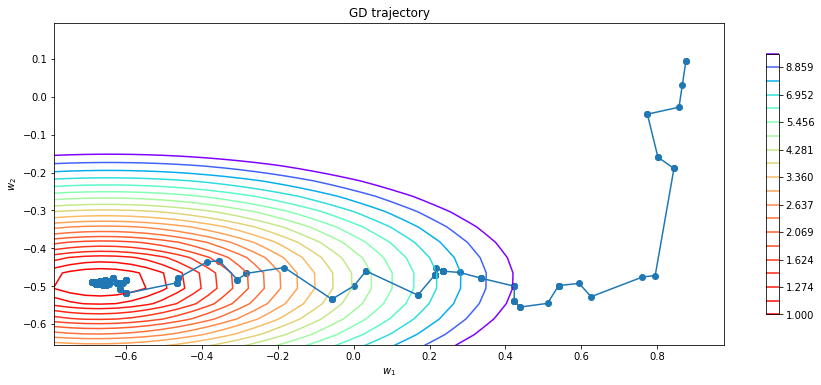

In [113]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

al.lr = 0.04
al.add_const = False
al.fit(X, y)
plot_gd(al.traj, X, y, loss)

# Теперь появились шаги не в направлении минимума (именно они позволяют выпрыгивать из локальных минимумов),
# но ближе к минимуму число таких шагов сильно падает.

In [114]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)

print('GD:', loss.calc_loss(X, y, w_list[-1]))
print('Anneal:', loss.calc_loss(X, y, al.traj[-1]))

# Финальный лосс почти одинаковый.

GD: 0.8670644395649494
Anneal: 0.8670753776017167
